In [5]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score, KFold
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# First Analysis

In [529]:
HRisk_data = pd.read_csv("Maternal Health Risk Data Set.csv")
HRisk_data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


#### The target column is RiskLevel with three classes named: 'high risk', 'low risk', 'mid risk'

In [530]:
HRisk_data["RiskLevel"].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

# Data pre-processing

### Removing NaN values

In [531]:
HRisk_data = HRisk_data.dropna()
HRisk_data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


#### Converting mid risk and high risk to 1 and low risk to 0

In [532]:
HRisk_data["RiskLevel"] = HRisk_data["RiskLevel"].replace({"low risk": 0, "mid risk": 1, "high risk": 1})
HRisk_data["RiskLevel"].unique()

array([1, 0], dtype=int64)

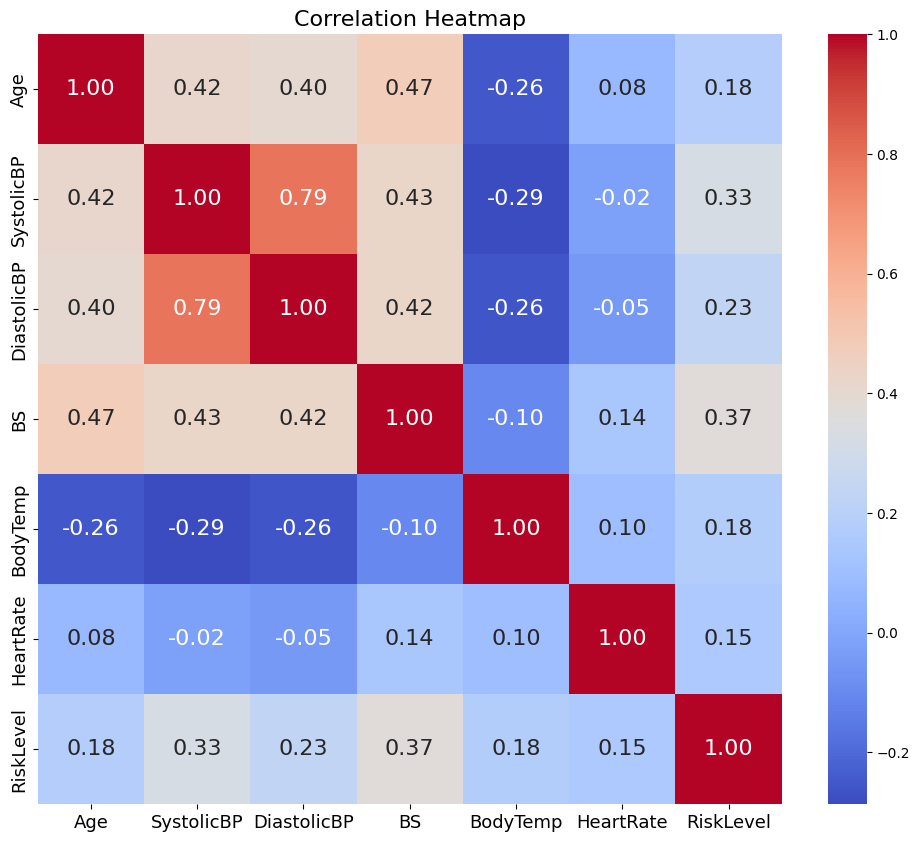

In [533]:
# plt.figure(figsize=(12, 10))
# sns.heatmap(HRisk_data.corr(), annot=True, cmap='coolwarm', fmt=".2f",
#                       annot_kws={"fontsize": 7})  # Adjust fontsize as needed
# plt.title("correlation heatmap")
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(HRisk_data.corr(), annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"fontsize": 16})  # Adjust fontsize as needed
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=13)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=13)
plt.title("Correlation Heatmap", fontsize=16)  # Adjust fontsize as needed
plt.show()

Text(0.5, 1.0, 'Counts of each target names')

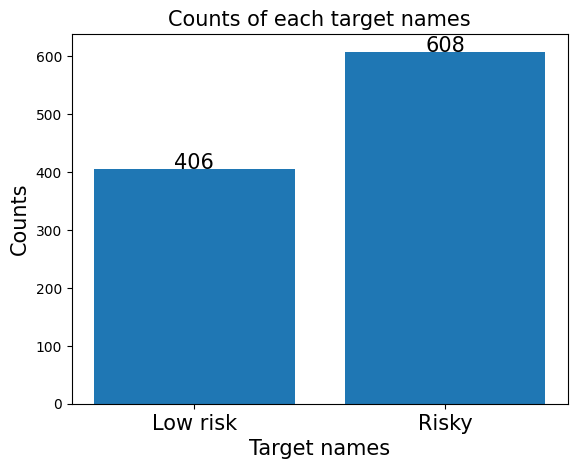

In [534]:
lowRisk_count = HRisk_data[HRisk_data["RiskLevel"] == 0].RiskLevel.count()
Risky_count = HRisk_data[HRisk_data["RiskLevel"] == 1].RiskLevel.count()

plt.bar(['Low risk', 'Risky'], [lowRisk_count, Risky_count])
plt.xticks(fontsize=15)

for i, count in enumerate([lowRisk_count, Risky_count]):
    plt.text(i, count + 0.1, str(count), ha='center', fontsize=15)

plt.xlabel("Target names", fontsize=15)
plt.ylabel("Counts", fontsize=15)
plt.title("Counts of each target names", fontsize=15)

In [535]:
data = HRisk_data[["SystolicBP", "DiastolicBP", "BS", "RiskLevel", "BodyTemp"]]
data

,SystolicBP,DiastolicBP,BS,RiskLevel,BodyTemp
0,130,80,15.0,1,98.0
1,140,90,13.0,1,98.0
2,90,70,8.0,1,100.0
3,140,85,7.0,1,98.0
4,120,60,6.1,0,98.0
...,...,...,...,...,...
1009,120,60,15.0,1,98.0
1010,120,90,18.0,1,98.0
1011,85,60,19.0,1,98.0
1012,120,90,18.0,1,98.0


In [536]:
X = HRisk_data.drop("RiskLevel", axis=1).values.copy()
y = HRisk_data["RiskLevel"].values.copy()


### Defining the decision boundaries

In [537]:
y_data = y
X_data_Sys_Dia = HRisk_data[["SystolicBP", "DiastolicBP"]]
X_data_Sys_BS = HRisk_data[["SystolicBP", "BS"]]

c:\Users\Sadra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


'b0 -> -6.860723736639267'

'b1 -> 0.5138153397219627'

'b -> [0.02902183 0.51381534]'

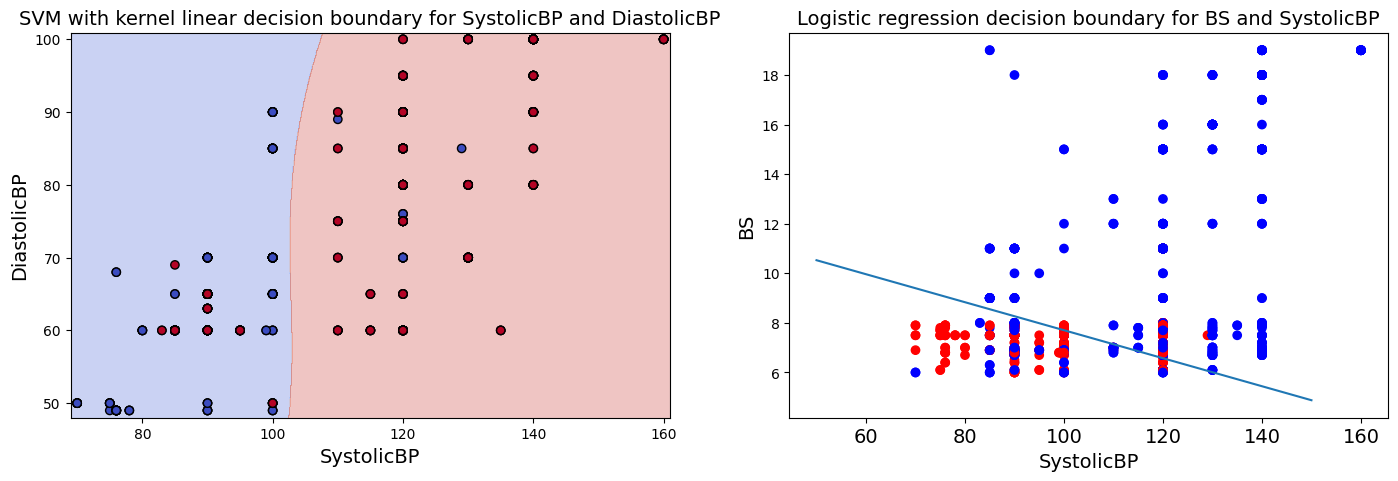

In [538]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

fig, axs = plt.subplots(1, 2, figsize=(17, 5))




clf = SVC(kernel='poly', class_weight={0: 1, 1: 1})
clf.fit(X_data_Sys_Dia, y_data)
x_min, x_max = X_data_Sys_Dia.iloc[:, 0].min() - 1, X_data_Sys_Dia.iloc[:, 0].max() + 1
y_min, y_max = X_data_Sys_Dia.iloc[:, 1].min() - 1, X_data_Sys_Dia.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[0].contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
# Plot class samples
axs[0].scatter(X_data_Sys_Dia.iloc[:, 0], X_data_Sys_Dia.iloc[:, 1], c=y_data, cmap='coolwarm', edgecolors='k')
plt.xticks(fontsize=14)
axs[0].set_xlabel('SystolicBP', fontsize = 14)
axs[0].set_ylabel('DiastolicBP', fontsize = 14)
axs[0].set_title("SVM with kernel linear decision boundary for SystolicBP and DiastolicBP", fontsize = 14)



color = ['r' if y == 0 else "b" for y in HRisk_data["RiskLevel"]]
lm = LogisticRegression()
lm.fit(HRisk_data[["SystolicBP", "BS"]], HRisk_data["RiskLevel"])
axs[1].scatter(HRisk_data["SystolicBP"], HRisk_data["BS"], c=color)
b0 = lm.intercept_[0]
b = lm.coef_[0]
x_ = [50, 150]
y_ = [-(b0 + b[0] * x)/b[1] for x in x_]
axs[1].plot(x_, y_)
axs[1].set_xlabel("SystolicBP", fontsize = 14)
axs[1].set_ylabel("BS", fontsize = 14)
axs[1].set_title("Logistic regression decision boundary for BS and SystolicBP", fontsize = 14)
display(f"b0 -> {b0}")
display(f"b1 -> {b[1]}")
display(f"b -> {b}")



In [539]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [540]:
precisionList = []
recallList = []
f_scoreList = []


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred, labels=[0, 1])
precisionList.append(round(p[1], 2))
recallList.append(round(r[1], 2))
f_scoreList.append(round(f[1], 2))
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))


'precision = [0.61       0.81553398]'

'recall = [0.7625     0.68292683]'

'f-score = [0.67777778 0.74336283]'

# Confusion matrix for Logistic Regression

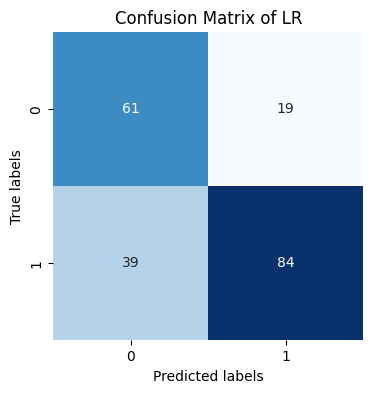

In [541]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of LR')
plt.show()

# SVM polynomial

In [542]:
precisionList = []
recallList = []
f_scoreList = []


model = SVC(kernel="poly")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred, labels=[0, 1])
precisionList.append(round(p[1], 2))
recallList.append(round(r[1], 2))
f_scoreList.append(round(f[1], 2))
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))


'precision = [0.62037037 0.86315789]'

'recall = [0.8375     0.66666667]'

'f-score = [0.71276596 0.75229358]'

In [543]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM polynomial changing class weight

In [544]:
precisionList = []
recallList = []
f_scoreList = []


model = SVC(kernel="poly", class_weight={0: .9, 1: 1})
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred, labels=[0, 1])
precisionList.append(round(p[1], 2))
recallList.append(round(r[1], 2))
f_scoreList.append(round(f[1], 2))
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'precision = [0.67816092 0.81896552]'

'recall = [0.7375     0.77235772]'

'f-score = [0.70658683 0.79497908]'

# Selected confusion matrix for SVM polynomial

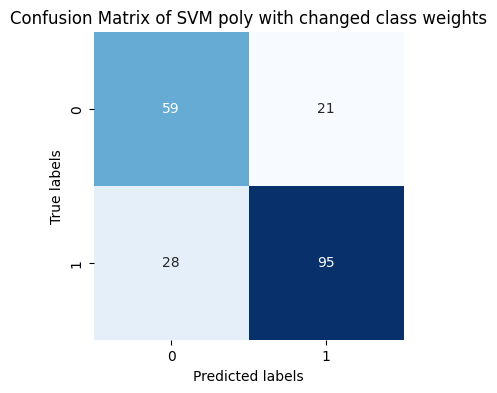

In [545]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of SVM poly with changed class weights')
plt.show()

# SVM RBF


In [546]:
precisionList = []
recallList = []
f_scoreList = []

model = SVC(kernel="rbf")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred, labels=[0, 1])
precisionList.append(round(p[1], 2))
recallList.append(round(r[1], 2))
f_scoreList.append(round(f[1], 2))
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'precision = [0.63291139 0.75806452]'

'recall = [0.625      0.76422764]'

'f-score = [0.62893082 0.7611336 ]'

# Confusion matrix with kernel rbf

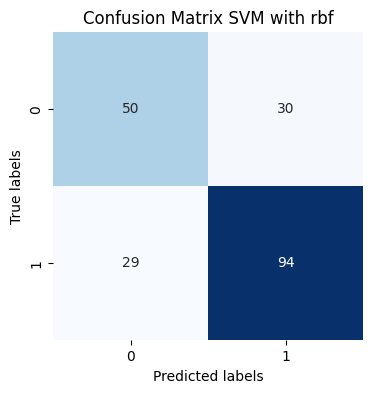

In [547]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix SVM with rbf')
plt.show()

# Second analysis

In [140]:
data = pd.read_csv("apple_quality.csv")
data

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


# Data preprocessing

In [141]:
data = data.dropna()
data = data.drop('A_id',axis=1)
data['Acidity'] = data['Acidity'].astype(float)
data['Quality'] = data['Quality'].replace({'good': 1, 'bad': 0})

##data = data.head(1000)

data

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1


In [142]:
X = data.drop("Quality", axis=1).values.copy()
y = data["Quality"].values.copy()

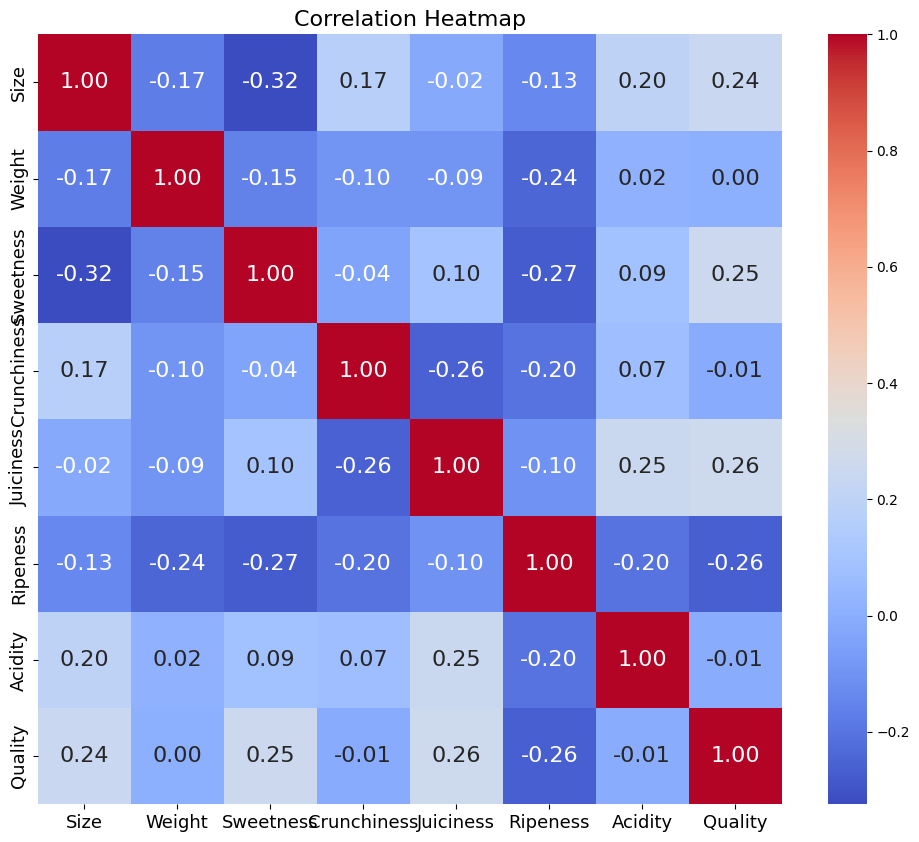

In [143]:
# plt.figure(figsize=(12, 10))
# sns.heatmap(HRisk_data.corr(), annot=True, cmap='coolwarm', fmt=".2f",
#                       annot_kws={"fontsize": 7})  # Adjust fontsize as needed
# plt.title("correlation heatmap")
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"fontsize": 16})  # Adjust fontsize as needed
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=13)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=13)
plt.title("Correlation Heatmap", fontsize=16)  # Adjust fontsize as needed
plt.show()

In [144]:
# NEW

In [145]:
from sklearn.linear_model import LogisticRegression

X = data[['Size','Sweetness']]
y = data.Quality

lm = LogisticRegression(class_weight={0:0.2, 1:0.8})
lm.fit(X, y)

# print(lm.intercept_)
# print(lm.coef_)

y_pred = lm.predict(X)

display(y_pred)

display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))

p,r,f,s = precision_recall_fscore_support(y, y_pred, labels=[1,0])
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

'predicted range: [0.00,1.00]'

'precision = [0.5347623  0.83933518]'

'recall = [0.97105788 0.15180361]'

'f-score = [0.68970406 0.25710649]'

Text(0, 0.5, 'Size')

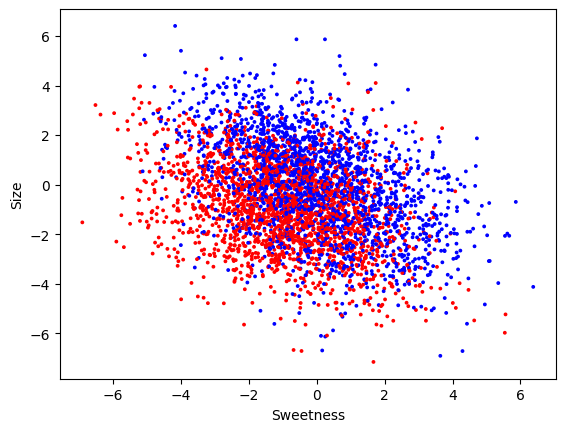

In [146]:
# Plot the dataset colored by actual value
color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(data.Sweetness, data.Size, c=color, s=3)
plt.xlabel('Sweetness')
plt.ylabel('Size')

# # display(lm.intercept_)
# # display(lm.coef_)

In [147]:
import random

n = 5
sweetness = [random.uniform(-1.5,1.5) for _ in range(n)]
size = [random.uniform(-2.5,2.5) for _ in range(n)]
df_temp = pd.DataFrame({'Size':size,'Sweetness':sweetness})
df_temp
plabel = lm.predict(df_temp)
plabel

array([1, 1, 1, 1, 1], dtype=int64)

Text(0, 0.5, 'Size')

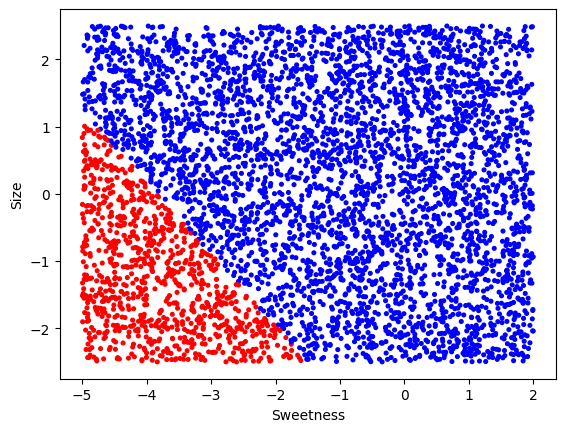

In [148]:
# Plot random points colored by predicted value
b0 = lm.intercept_
b = lm.coef_[0]

# Plot random points colored by prediction
import random

n = 5000
newx = [random.uniform(-5,2) for _ in range(n)]
newy = [random.uniform(-2.5,2.5) for _ in range(n)]
df_temp = pd.DataFrame({'Size':newy,'Sweetness':newx})
newlabel = lm.predict(df_temp)

color = ['r' if y_ == 0 else 'b' for y_ in newlabel]
plt.figure()
plt.scatter(newx, newy, c=color, marker='o', s=7)
plt.xlabel('Sweetness')
plt.ylabel('Size')

Text(0, 0.5, 'Size')

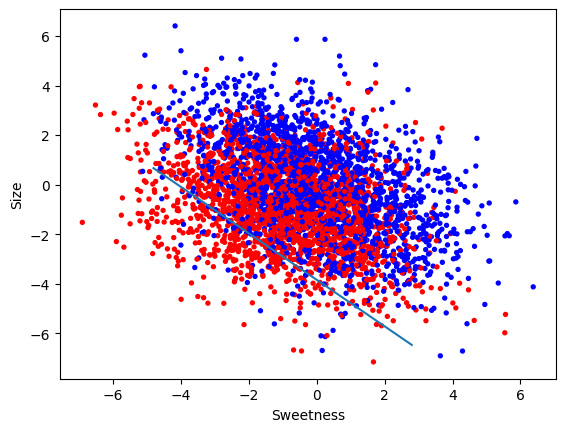

In [149]:
color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(data.Sweetness, data.Size, c=color, s=8)

b0 = lm.intercept_[0]
b = lm.coef_[0]

Xdb = [-4.8, 2.8]
ydb = [-(b0+b[0]*x)/b[1] for x in Xdb]
plt.plot(Xdb, ydb)
plt.xlabel('Sweetness')
plt.ylabel('Size')

In [130]:
### Logistic regression results sucked

In [169]:
df = pd.read_csv("apple_quality.csv")

In [170]:

df = df.dropna()
df = df.drop('A_id',axis=1)
df['Acidity'] = df['Acidity'].astype(float)
df['Quality'] = df['Quality'].replace({'good': 1, 'bad': 0})


In [175]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, recall_score
from sklearn.preprocessing import StandardScaler


X = df.drop("Quality", axis=1).values.copy()
y = df["Quality"].values.copy()

display(X)


# Step 4: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train SVM Model
# Optional: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create SVM model
svm_model = SVC(kernel='linear')  # You can choose different kernels like 'rbf', 'poly', etc.

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Step 6: Evaluate Model
# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

array([[-3.97004852, -2.51233638,  5.34632961, ...,  1.84490036,
         0.3298398 , -0.49159048],
       [-1.19521719, -2.83925653,  3.66405876, ...,  0.8532858 ,
         0.86753008, -0.72280937],
       [-0.29202386, -1.35128199, -1.73842916, ...,  2.83863551,
        -0.03803333,  2.62163647],
       ...,
       [-2.6345153 , -2.13824672, -2.44046129, ...,  2.19970859,
         4.76385918, -1.33461139],
       [-4.00800374, -1.77933711,  2.36639697, ...,  2.16143512,
         0.21448838, -2.22971981],
       [ 0.27853965, -1.71550503,  0.12121725, ...,  1.2666774 ,
        -0.77657147,  1.59979646]])

F1-score: 0.7587064676616916
Recall: 0.7644110275689223


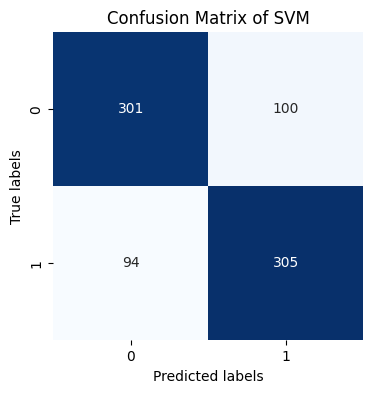

In [196]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of SVM')
plt.show()